In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('/content/drive/My Drive/pizza_data.csv')
df

,brand,price,weight,crust,cheese,size,toppings,spicy,ranking
0,Dominos,$1.00,100g,thin,Mozzarella,regular,paneer,normal,11
1,Pizza hut,$3.00,100g,thin,Cheddar,large,mushroom,normal,12
2,Onesta,$4.00,200g,thin,Mozzarella,regular,mushroom,normal,9
3,Pizza hut,$4.00,400g,thick,Cheddar,regular,paneer,normal,2
4,Pizza hut,$2.00,300g,thin,Mozzarella,regular,mushroom,extra,8
5,Pizza hut,$1.00,200g,thick,Mozzarella,large,paneer,extra,13
6,Onesta,$3.00,300g,thick,Mozzarella,large,paneer,normal,7
7,Dominos,$4.00,300g,thin,Cheddar,large,paneer,extra,4
8,Dominos,$2.00,400g,thick,Mozzarella,large,mushroom,normal,5
9,Oven Story,$4.00,100g,thick,Mozzarella,large,mushroom,extra,16


In [4]:
df.nunique()

,0
brand,4
price,4
weight,4
crust,2
cheese,2
size,2
toppings,2
spicy,2
ranking,16


As we can see in the data, this store has 8 attributes of Pizza 🍕 they want to analyze, namely - brand, price, weight, crust, cheese, size, toppings, spicy.


Brand, Price and Weight have 4 levels each whereas the rest of the attributes have 2 levels each!


We have a ranking column which states the ranking of the combination of levels in each row. There are 16 distinct combinations and each is given a unique rank based on user preferences.

In [5]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


# Define the model formula using a regression model where 'ranking' is the dependent variable.
# 'C(brand, Sum)' denotes that the variable 'brand' is treated as a categorical variable,
# and the 'Sum' contrast coding scheme is applied. This is repeated for other variables.

model='ranking ~ C(brand,Sum)+C(price,Sum)+C(weight,Sum)+C(crust,Sum)+C(cheese,Sum)+C(size,Sum)+C(toppings,Sum)+C(spicy,Sum)'

# Fit the Ordinary Least Squares (OLS) regression model to the data using the specified formula.
# The formula API (`smf.ols`) allows for the convenient specification of models using a formula string.
# Here, the dependent variable is 'ranking', and the independent variables are the specified categorical predictors.

model_fit=smf.ols(model,data=df).fit()

# Display the summary of the fitted regression model.
# This includes information such as coefficients, R-squared, p-values, and other diagnostic statistics.

print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                ranking   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     97.07
Date:                Mon, 28 Apr 2025   Prob (F-statistic):             0.0794
Time:                        00:58:22   Log-Likelihood:                 10.568
No. Observations:                  16   AIC:                             8.864
Df Residuals:                       1   BIC:                             20.45
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=16 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [6]:
conjoint_attributes = ['brand','price','weight','crust','cheese','size','toppings','spicy']

Next, I am calculating the Utility Values/Part-worths: The amount of weight an attribute level carries with a respondent. These factors lead to a product’s overall value to consumers.

In [7]:
level_name = []  # Stores the unique levels (categories) for each attribute.
part_worth = []  # Stores the part-worth values for each of the levels of each attribute.
part_worth_range = []  # Stores the range of part-worth values for each attribute.
important_levels = {}  # A dictionary to store the most important level for each attribute.
end = 1  # Initialize index for coefficient in params


# Loop through all attributes included in the conjoint analysis.

for item in conjoint_attributes:

    # Determine the number of unique levels for the current attribute.
    nlevels = len(list(np.unique(df[item])))
    level_name.append(list(np.unique(df[item]))) # Append the list of unique levels to `level_name`.

    begin = end
    end = begin + nlevels -1


    # Extract the part-worth coefficients for the current attribute from the model's parameters. These are same the the
    # regression coefficients that we got in the model that we ran
    new_part_worth = list(model_fit.params[begin:end])
    new_part_worth.append(0)
    important_levels[item] = np.argmax(new_part_worth)
    part_worth.append(new_part_worth)
    print(item)
    #print(part_worth)
    part_worth_range.append(max(new_part_worth) - min(new_part_worth))
    # next iteration
print("-------------------------------------------------------------")
print("List of all the levels name for each of the 8 attributes:")
print(level_name)

print("part worth values for all the levels name for each of the 8 attributes:")
print(part_worth)

print("part worth range for each of the attributes:")
print(part_worth_range)

print("Total number of attributes:")
print(len(part_worth))

print("most important level for each of the attributes")
print(important_levels)

brand
price
weight
crust
cheese
size
toppings
spicy
-------------------------------------------------------------
List of all the levels name for each of the 8 attributes:
[['Dominos', 'Onesta', 'Oven Story', 'Pizza hut'], ['$1.00', '$2.00', '$3.00', '$4.00'], ['100g', '200g', '300g', '400g'], ['thick', 'thin'], ['Cheddar', 'Mozzarella'], ['large', 'regular'], ['mushroom', 'paneer'], ['extra', 'normal']]
part worth values for all the levels name for each of the 8 attributes:
[[-2.886579864025407e-15, 1.2434497875801753e-14, -0.2500000000000103, 0], [0.7500000000000036, 3.552713678800501e-15, -5.773159728050814e-15, 0], [5.000000000000005, 1.9999999999999982, -1.2500000000000009, 0], [1.7499999999999993, 0], [-0.24999999999999978, 0], [-0.2500000000000011, 0], [1.1249999999999991, 0], [0.7500000000000009, 0]]
part worth range for each of the attributes:
[0.25000000000002276, 0.7500000000000093, 6.250000000000006, 1.7499999999999993, 0.24999999999999978, 0.2500000000000011, 1.12499999999

Now, we will calculate the importance of each attribute.


Relative importance: It depicts which attributes are more or less important when purchasing. E.g., a Mobile Phone’s Relative importance could be Brand 30%, Price 30%, Size 20%, Battery Life 10%, and Color 10%.

In [8]:
#the higher the range of part-worth, the higher the importance of the attribute.
# I am calculating the importance as a % of the total range of part-worths.

attribute_importance = []
for i in part_worth_range:
    #print(i)
    attribute_importance.append(round(100*(i/sum(part_worth_range)),2))
print(attribute_importance)

[2.2, 6.59, 54.95, 15.38, 2.2, 2.2, 9.89, 6.59]


I am just printing the names of the attributes, levels and their respective part-worths/utility-values.



In [9]:
part_worth_dict={}
attrib_level={}
for item,i in zip(conjoint_attributes,range(0,len(conjoint_attributes))):
    print("Attribute :",item)
    print("Relative importance of attribute ",attribute_importance[i])
    print("Level wise part worths: ")
    for j in range(0,len(level_name[i])):
        print(i,j, "    {}:{}".format(level_name[i][j],part_worth[i][j]))
        part_worth_dict[level_name[i][j]]=part_worth[i][j]
        attrib_level[item]=(level_name[i])
    print("\n")

print("------------------------------------------------")
part_worth_dict

Attribute : brand
Relative importance of attribute  2.2
Level wise part worths: 
0 0     Dominos:-2.886579864025407e-15
0 1     Onesta:1.2434497875801753e-14
0 2     Oven Story:-0.2500000000000103
0 3     Pizza hut:0


Attribute : price
Relative importance of attribute  6.59
Level wise part worths: 
1 0     $1.00:0.7500000000000036
1 1     $2.00:3.552713678800501e-15
1 2     $3.00:-5.773159728050814e-15
1 3     $4.00:0


Attribute : weight
Relative importance of attribute  54.95
Level wise part worths: 
2 0     100g:5.000000000000005
2 1     200g:1.9999999999999982
2 2     300g:-1.2500000000000009
2 3     400g:0


Attribute : crust
Relative importance of attribute  15.38
Level wise part worths: 
3 0     thick:1.7499999999999993
3 1     thin:0


Attribute : cheese
Relative importance of attribute  2.2
Level wise part worths: 
4 0     Cheddar:-0.24999999999999978
4 1     Mozzarella:0


Attribute : size
Relative importance of attribute  2.2
Level wise part worths: 
5 0     large:-0.250000

{'Dominos': -2.886579864025407e-15,
 'Onesta': 1.2434497875801753e-14,
 'Oven Story': -0.2500000000000103,
 'Pizza hut': 0,
 '$1.00': 0.7500000000000036,
 '$2.00': 3.552713678800501e-15,
 '$3.00': -5.773159728050814e-15,
 '$4.00': 0,
 '100g': 5.000000000000005,
 '200g': 1.9999999999999982,
 '300g': -1.2500000000000009,
 '400g': 0,
 'thick': 1.7499999999999993,
 'thin': 0,
 'Cheddar': -0.24999999999999978,
 'Mozzarella': 0,
 'large': -0.2500000000000011,
 'regular': 0,
 'mushroom': 1.1249999999999991,
 'paneer': 0,
 'extra': 0.7500000000000009,
 'normal': 0}

Lets now plot the relative importance values for all the attributes

Text(0, 0.5, 'Importance')

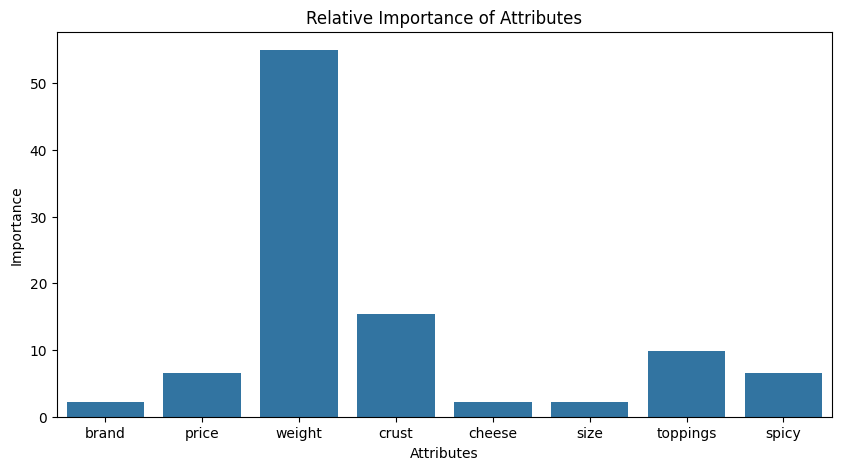

In [10]:
import matplotlib.pyplot as plt  # For creating the plot
import seaborn as sns  # For the bar plot with enhanced visualization

plt.figure(figsize=(10,5))
sns.barplot(x=conjoint_attributes,y=attribute_importance)
plt.title('Relative Importance of Attributes')
plt.xlabel('Attributes')
plt.ylabel('Importance')

###Weight has the highest importance in choosing the pizza of 54%, whereas the factors like brand, cheese, and size matter the least at 2.2%

Now, I am calculating the total utility score for each of the 16 profiles that we have. This will help us identify the best pizza profile to sell.

In [11]:
utility = []
for i in range(df.shape[0]):
    score = part_worth_dict[df['brand'][i]]+part_worth_dict[df['price'][i]]+part_worth_dict[df['weight'][i]]+part_worth_dict[df['crust'][i]]+part_worth_dict[df['cheese'][i]]+part_worth_dict[df['size'][i]] +part_worth_dict[df['toppings'][i]]+part_worth_dict[df['spicy'][i]]
    utility.append(score)

df['utility'] = utility
utility

[5.750000000000006,
 5.624999999999998,
 3.1250000000000098,
 1.4999999999999996,
 0.6250000000000027,
 5.000000000000001,
 0.250000000000004,
 -1.0000000000000038,
 2.6249999999999982,
 8.124999999999993,
 2.125000000000015,
 1.2499999999999907,
 1.8749999999999911,
 7.250000000000021,
 0.4999999999999848,
 5.374999999999989]

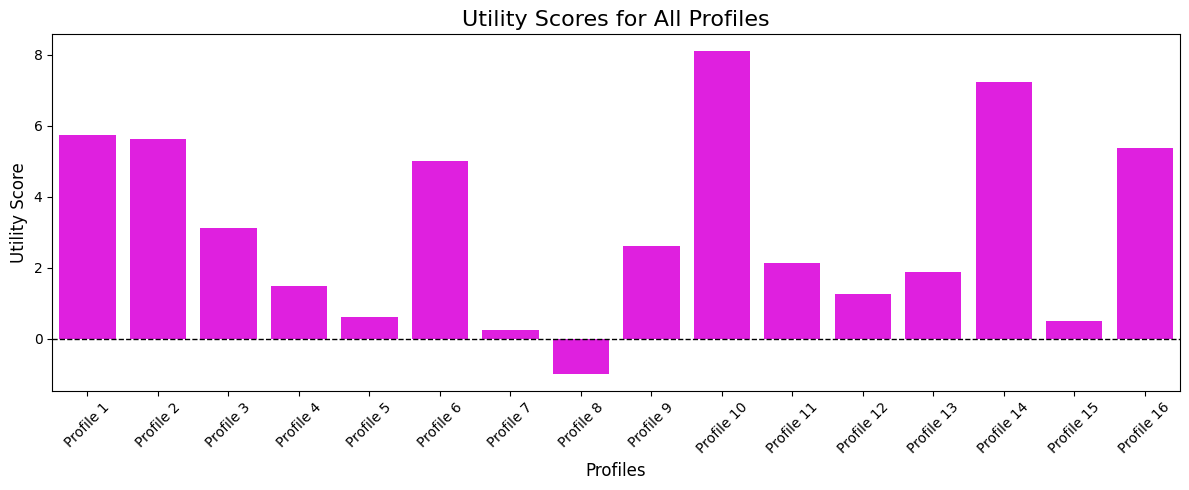

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create an index for the profiles
profiles = [f'Profile {i+1}' for i in range(len(utility))]

# Set up the plot
plt.figure(figsize=(12, 5))
sns.barplot(x=profiles, y=utility, color="magenta")

# Add titles and labels
plt.title('Utility Scores for All Profiles', fontsize=16)
plt.xlabel('Profiles', fontsize=12)
plt.ylabel('Utility Score', fontsize=12)

# Add a horizontal line at y=0 for clarity
plt.axhline(0, color='black', linewidth=1, linestyle='--')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


We can see that profile number 10 has the highest desirability followed by profile 14 and 1. Profile 8 is the most disliked kind of pizza.

In [13]:
print("The profile that has the highest utility score :",'\n', df.iloc[np.argmax(utility)])

The profile that has the highest utility score : 
 brand       Oven Story
price            $4.00
weight            100g
crust            thick
cheese      Mozzarella
size             large
toppings      mushroom
spicy            extra
ranking             16
utility          8.125
Name: 9, dtype: object


#🍕If we are planning to sell pizzas, we should have the above levels for each of the 8 attributes of the pizza we sell.🍕